In [133]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

%matplotlib inline

In [39]:
cdata = pd.read_csv("census2000.csv")

In [52]:
nosex = cdata.groupby(["Year", "Age"]).sum()

In [57]:
yeartotals = nosex.groupby('Year').sum()

In [77]:
yeartotals
earlyyr = min(yeartotals.index)
lateyr = max(yeartotals.index)

In [80]:
early = nosex[nosex.index.get_level_values('Year').isin([earlyyr])]['People'].as_matrix()
early = early / yeartotals.loc[earlyyr].People

In [81]:
late = nosex[nosex.index.get_level_values('Year').isin([lateyr])]['People'].as_matrix()
late = late / yeartotals.loc[lateyr].People

In [114]:
early

array([ 0.12075006,  0.11612822,  0.10567952,  0.0993484 ,  0.09762423,
        0.08687504,  0.07322228,  0.06532174,  0.05593888,  0.04610947,
        0.03911498,  0.02919562,  0.02365607,  0.01721514,  0.01173251,
        0.00700328,  0.00340774,  0.00121451,  0.00046231])

In [87]:
np.stack([late, late])

array([[ 0.12075006,  0.11612822,  0.10567952,  0.0993484 ,  0.09762423,
         0.08687504,  0.07322228,  0.06532174,  0.05593888,  0.04610947,
         0.03911498,  0.02919562,  0.02365607,  0.01721514,  0.01173251,
         0.00700328,  0.00340774,  0.00121451,  0.00046231],
       [ 0.06767836,  0.07327716,  0.0731494 ,  0.07081955,  0.067712  ,
         0.06814708,  0.07222345,  0.08212199,  0.08104887,  0.07172983,
         0.06189689,  0.04754572,  0.03834956,  0.03289881,  0.03189886,
         0.02582716,  0.01820952,  0.0104879 ,  0.0049779 ]])

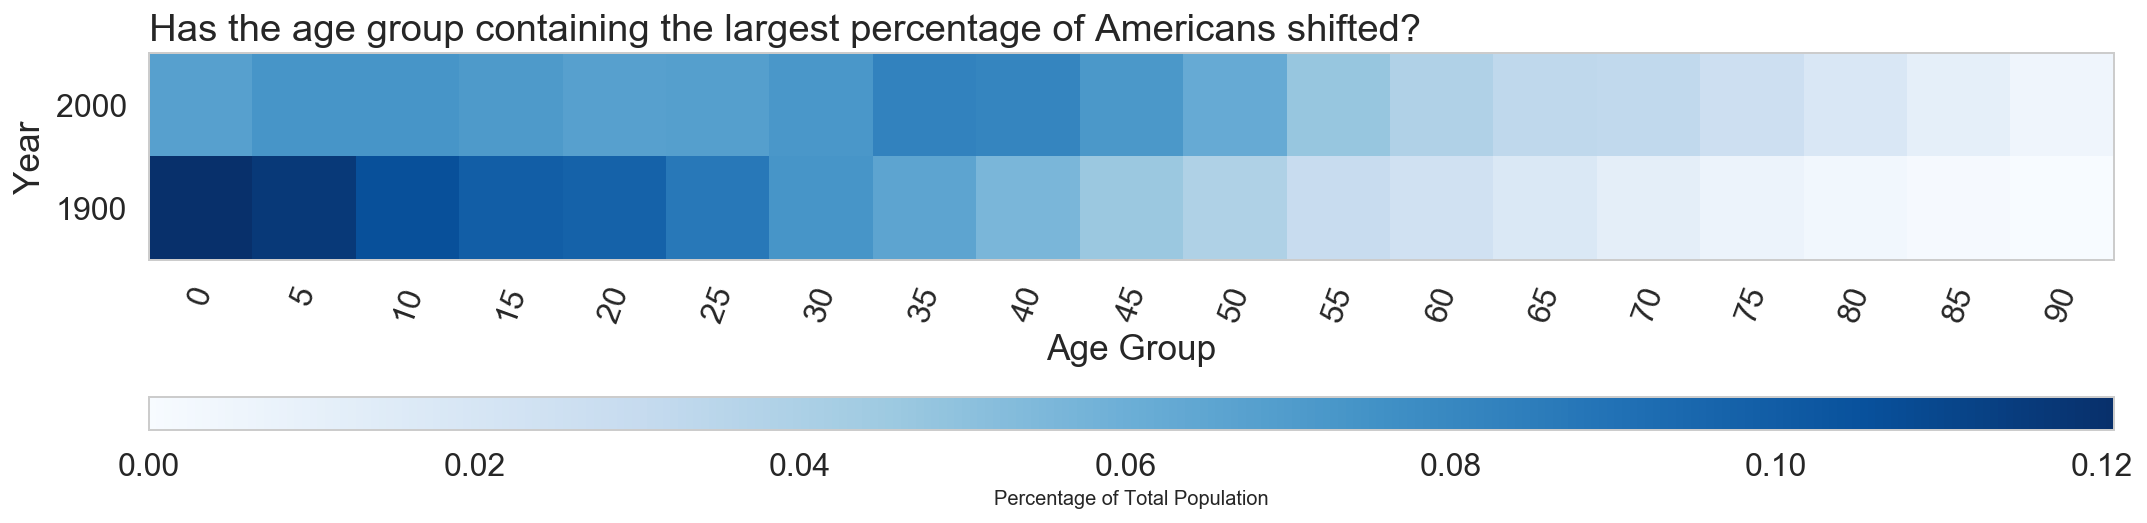

In [188]:
sns.set_style("whitegrid", {'axes.grid' : False})


plt.figure(figsize=(15,7))
main = plt.imshow(np.stack([late, early]), cmap='Blues', vmin=0)
""
plt.yticks([0,1], [lateyr, earlyyr])
plt.ylabel("Year")

plt.xticks(range(len(late)), nosex.index.get_level_values('Age'), rotation=70)
plt.xlabel("Age Group")
cb = plt.colorbar(orientation='horizontal',fraction=0.08, aspect=60 )
cb.ax.set_xlabel("Percentage of Total Population", fontsize=10, )


plt.title("Has the age group containing the largest percentage of Americans shifted?", loc='left')

plt.tight_layout()

In [147]:
len(nosex.index.get_level_values('Year'))

38

In [ ]:
?plt.col